## Workflow

- Importing the dataset using pandas
- Cleansing and Preprocessing Dataset using neattext
- Creaing Features and Labels
- Splitting data into Test and Train sets (7:3 ratio)
- Training the model
- Check models : **SVM, Linear Regression, Multinomial Navie Baise**
- Save model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("emotion_dataset_raw.csv")

In [3]:
print(f"The shape of dataset is : {df.shape}\n")
print(f'The dtype of dataset is:\n{df.dtypes}\n')

The shape of dataset is : (34792, 2)

The dtype of dataset is:
Emotion    object
Text       object
dtype: object



In [4]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [5]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

C:\Users\rohit\AppData\Local\Temp\ipykernel_13040\2902247707.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion',data=df,palette='rainbow')


<Axes: xlabel='Emotion', ylabel='count'>

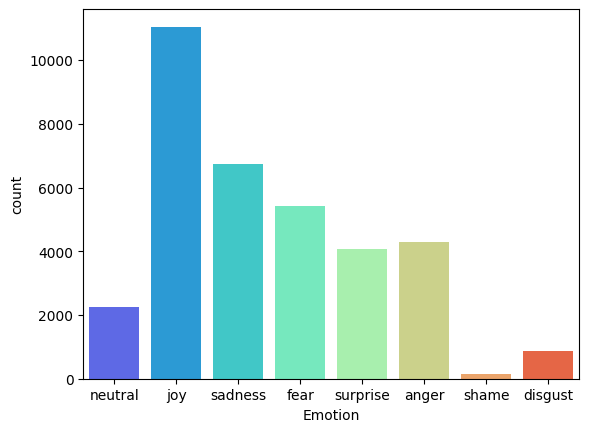

In [6]:
sns.countplot(x='Emotion',data=df,palette='rainbow')

### Data pre-processing

* Using neaxttext for data cleansing and preprocessing

In [8]:
import neattext.functions as nfx

df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles) #removing user handles

# Remove stop words
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

# Remove punctuations
df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)

# Remove special characters
df['Clean_Text'] = df['Text'].apply(nfx.remove_special_characters)

In [9]:
df[['Text','Clean_Text']].head()

,Text,Clean_Text
0,Why ?,Why
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...


In [10]:
# Creating featues and targets
x = df['Clean_Text']
y = df['Emotion']

### Spliting data into train set and test set

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Training the model


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [13]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

C:\Users\rohit\OneDrive\Documents\Projects\emotion-detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6338378999808393

In [14]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 15))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.6307721785782717

In [15]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'linear', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.5829660854569841

In [16]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5472312703583062

In [17]:
pipe_nv = Pipeline(steps=[('cv',CountVectorizer()),('nv', MultinomialNB())])
pipe_nv.fit(x_train,y_train)
pipe_nv.score(x_test,y_test)

0.5690745353515999

#### Implementation wihout pipeline
Here is an implementation without the pipeline

In [18]:
cv = CountVectorizer()
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)


In [19]:
nv_model = MultinomialNB()
nv_model.fit(x_train_cv,y_train)

MultinomialNB()

In [20]:
nv_model.score(x_test_cv, y_test) #accuracy

0.5690745353515999

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
y_pred_for_nv = nv_model.predict(x_test_cv)
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.65      0.49      0.56      1283
     disgust       0.75      0.02      0.04       292
        fear       0.75      0.58      0.65      1645
         joy       0.51      0.88      0.65      3311
     neutral       0.84      0.11      0.19       675
     sadness       0.55      0.54      0.55      2015
       shame       0.00      0.00      0.00        36
    surprise       0.62      0.23      0.34      1181

    accuracy                           0.57     10438
   macro avg       0.58      0.36      0.37     10438
weighted avg       0.61      0.57      0.53     10438



C:\Users\rohit\OneDrive\Documents\Projects\emotion-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\OneDrive\Documents\Projects\emotion-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\OneDrive\Documents\Projects\emotion-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

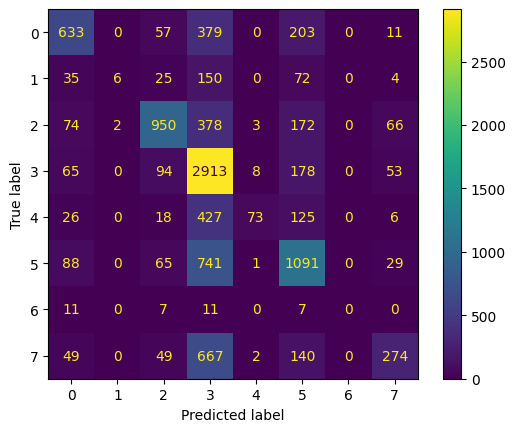

In [24]:
# Confusion
plm = confusion_matrix(y_test,y_pred_for_nv)
plm_display = ConfusionMatrixDisplay(confusion_matrix=plm)
plm_display.plot()

### Saving the model

In [25]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()